# SQL Анализ базы данных сервиса для чтения книг

# Описание проекта  

Компания приобрела крупный сервис для чтения книг по подписке.
В базе данных находится информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

# Цель проекта  

Предоставление аналитических данных для формулирования ценностного предложения для нового продукта

**Задачи:**  

Написать и выполнить с помощью удаленного подключения SQL-запросы для получения следующих данных:  

- Подсчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги подсчить количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц, исключив таким образом из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг, только среди книг с 50 и более оценками;
- Подсчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.



# Описание данных:

**ER Диаграмма:**  
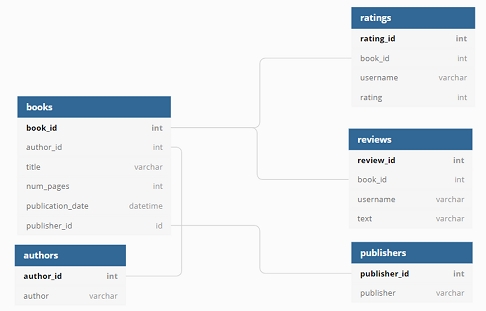

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

# Содержание  

1 Импорт библиотек и подключение к базе  
2 Обзор данных  
3 Решение задач  
3.1 Подсчет книг, вышедших после 1 января 2000 года  
3.2 Подсчет количества обзоров и расчет средней оценкки для каждой книги  
3.3 Определение издательства, выпустившего наибольшее число книг толще 50 страниц  
3.4 Определение автора с самой высокой средней оценкой книг (с 50 и более оценок)  
3.5 Расчет среднего количества обзоров от пользователей, которые поставили больше 50 оценок  
4 Общий вывод  

## 1 Импорт библиотек и подключение к базе

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': '*******',  # имя пользователя
             'pwd': '*******',  # пароль
             'host': '*******',  # хост
             'port': 6432,  # порт подключения
             'db': '*******'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [3]:
# создаем функцию для выполнения запросов
def go(query):
    return pd.io.sql.read_sql(query, con = engine)

## 2 Обзор данных

Загружаем данные:

In [4]:
books_query = ''' SELECT *
                  FROM books
              '''
books = go(books_query)



authors_query = ''' SELECT *
                    FROM authors
                '''
authors = go(authors_query)



publishers_query = ''' SELECT *
                       FROM publishers
                   '''
publishers = go(publishers_query)



ratings_query = ''' SELECT *
                    FROM ratings
                '''
ratings = go(ratings_query)



reviews_query = '''SELECT *
                   FROM reviews
                '''
reviews = go(reviews_query)

Выводим первые 5 строк каждой таблицы, общую информацию и проверяем на пропуски и дубликаты. Для однотипных повторяющихся операций запускаем цикл:

In [5]:
table_names = ['books', 'authors', 'publishers', 'ratings', 'reviews']  # список с названиями таблиц
variable_names = [books, authors, publishers, ratings, reviews]  # список имен переменных

for i in range(5):
    print()
    print('\033[1m''Обзор и проверка данных таблицы', table_names[i],'\033[0m')
    print('__________________________________________')
    display(variable_names[i].head())
    print()
    display(variable_names[i].info())
    print()
    print('\033[1m''Кол-во пропусков:\n\n''\033[0m', variable_names[i].isna().sum())
    print()
    print()
    print('\033[1m''Кол-во дубликатов:''\033[0m', variable_names[i].duplicated().sum())
    print()
    print('==========================================\n\n')


Обзор и проверка данных таблицы books 
__________________________________________


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None


Кол-во пропусков:

 book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64


Кол-во дубликатов: 0




Обзор и проверка данных таблицы authors 
__________________________________________


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None


Кол-во пропусков:

 author_id    0
author       0
dtype: int64


Кол-во дубликатов: 0




Обзор и проверка данных таблицы publishers 
__________________________________________


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None


Кол-во пропусков:

 publisher_id    0
publisher       0
dtype: int64


Кол-во дубликатов: 0




Обзор и проверка данных таблицы ratings 
__________________________________________


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None


Кол-во пропусков:

 rating_id    0
book_id      0
username     0
rating       0
dtype: int64


Кол-во дубликатов: 0




Обзор и проверка данных таблицы reviews 
__________________________________________


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None


Кол-во пропусков:

 review_id    0
book_id      0
username     0
text         0
dtype: int64


Кол-во дубликатов: 0





**Вывод:**  
На этапе обзора данных проблем не выявлено, пропусков и дубликатов нет.

## 3 Решение задач

### 3.1 Подсчет книг, вышедших после 1 января 2000 года

In [6]:
counting_books = '''SELECT COUNT(book_id)
                    FROM books
                    WHERE publication_date::date >= '01-01-2000'
                '''
go(counting_books)

,count
0,821


В базе данных есть информация о 821 книге, среди вышедших с 1 января 2000 года. Задача поставлена с использованием формулировки,  предполагающей двойное толкование (после начала 1 января или со второго). С учетом цели исследования, принято решение трактовать задачу в контесте  "с начала года".

### 3.2 Подсчет количества обзоров и расчет средней оценкки для каждой книги 

In [11]:
reviews_ratings = '''SELECT books.book_id,
                            title,
                            COUNT(DISTINCT review_id) AS count_reviews,
                            ROUND(AVG(rating), 3) AS avg_rating
                     FROM books
                     LEFT JOIN ratings ON books.book_id = ratings.book_id
                     LEFT JOIN reviews ON books.book_id = reviews.book_id
                     GROUP BY books.book_id,
                              title
                     ORDER BY count_reviews DESC
                     LIMIT 20
                  '''
go(reviews_ratings)

,book_id,title,count_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.663
1,627,The Alchemist,6,3.789
2,497,Outlander (Outlander #1),6,4.125
3,750,The Hobbit or There and Back Again,6,4.125
4,207,Eat Pray Love,6,3.396
5,656,The Book Thief,6,4.264
6,695,The Curious Incident of the Dog in the Night-Time,6,4.081
7,673,The Catcher in the Rye,6,3.826
8,733,The Giver (The Giver #1),6,3.750
9,734,The Glass Castle,6,4.207


1. Для всех 1000 книг, имеющихся в базе данных, произведены необходимые расчеты:
- поле `count_reviews` содержит информацию о количестве обзоров;  

- поле `avg_rating` содержит информацию о средних значениях оценок.
2. Самые популярные книги (по количеству обзоров):
- book_id 948, Twilight (Twilight #1)? 7 обзоров, средний рейтинг 3,663
- book_id 302, Harry Potter and the Prisoner of Azkaban, 6 обзоров, рейтинг 4,415
- book_id 299, Harry Potter and the Chamber of Secrets. 6 обзоров, рейтинг 4,288


### 3.3 Определение издательства, выпустившего наибольшее число книг толще 50 страниц

In [8]:
multi_page_publisher = ''' SELECT publishers.publisher_id AS id,
                                  publishers.publisher AS multi_page_publisher,
                                  COUNT(books.book_id) AS books_count
                           FROM publishers
                           LEFT JOIN books ON books.publisher_id = publishers.publisher_id
                           WHERE books.num_pages > 50
                           GROUP BY id, multi_page_publisher
                           ORDER BY books_count DESC
                           LIMIT 3
                       '''
go(multi_page_publisher)

,id,multi_page_publisher,books_count
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25


Издатель Penguin Books (id 212) выпустил наибольшее число книг (42) толще 50 страниц.

### 3.4 Определение автора с самой высокой средней оценкой книг (с 50 и более оценок)

In [9]:
top_author = '''SELECT a.author,
                       ROUND(AVG(r.rating), 3) as avg_rating
                FROM authors as a
                LEFT JOIN books as b ON a.author_id = b.author_id
                LEFT JOIN (SELECT *,
                                  COUNT(rating_id) OVER (PARTITION BY book_id) as count_rating
                           FROM ratings) as r ON b.book_id = r.book_id
                WHERE r.count_rating >= 50
                GROUP BY a.author_id
                ORDER BY avg_rating DESC
                LIMIT 3
             '''
go(top_author)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287
1,Markus Zusak/Cao Xuân Việt Khương,4.264
2,J.R.R. Tolkien,4.247


J.K. Rowling/Mary GrandPré является автором с самой высокой средней оценкой книг (с 50 и более оценок)

### 3.5 Расчет среднего количества обзоров от пользователей, которые поставили больше 50 оценок

In [10]:
avg_number_reviews = '''WITH i AS
                          (SELECT COUNT(reviews.review_id) AS count_reviews
                           FROM reviews
                           WHERE username IN (SELECT username
                                              FROM ratings
                                              GROUP BY username
                                              HAVING COUNT(rating_id) > 50)
                           GROUP BY username)  
                        SELECT ROUND(AVG(i.count_reviews), 3) AS avg_number_reviews
                        FROM i
                     '''
go(avg_number_reviews)

,avg_number_reviews
0,24.333


Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок, составляет 24,3.

## 4 Общий вывод

**В рамках проекта настроено удаленное соединение, выполнены SQL-запросы и получены следующие данные:**   
<br> 1. В базе данных есть информация о 821 книге, среди вышедших с 1 января 2000 года. Это кол-во ничтожно мало для развития сервиса по подписке, поскольку в мире ежегодно выходит от 100 до 250 тысяч новых книг. К примеру, один из ведущих сервисов Bookmate имеет в своей библиотеке около 1,8 млн. книг на 13 языках.  
<br> 2. Для 1000 книг, имеющихся в базе данных, произведены необходимые расчеты - добавлено поле count_reviews с информацией о количестве обзоров и поле avg_rating со средними значениями оценок. Среди самых популярных книг по количеству обзоров, лидируют книги жанра фэнтези: Twilight и две книги о Гарри Поттере - Harry Potter and the Prisoner of Azkaban и Harry Potter and the Chamber of Secrets.  
<br> 3. Три издательства лидируют по части выпуска книг (более 50 страниц), это Penguin Books (42), Vintage	(31) и Grand Central Publishing	(25). Следует отметить, что издательство Penguin Books входит в конгломерат Penguin Random House, где они успешно развивают направление электронных библиотек и издают ежегодно около 15 тысяч наименований.  
<br> 4. Самую высокую оценку книг получила автор книг о Гарри Поттере Rowling, вместе с иллюстратором Mary GrandPré они смогли создать книги, которые не оставили равнодушными большую часть неаселения земного шара.  
<br> 5. На каждого пользователя, оценившего более 50 книг приходится в среднем по 24 отзыва.  
  
  
**На основе выполненного исследования можно сформировать следующие рекомендации для книжного сервиса:**  
- направить основные усилия на прирост базы данных с книгами;   

- в качестве наиболее привлекательного контента для пользователей являются книги жанра фэнтези, с качественным оформлением, расширять библиотеку следует в первую очередь такими изданиями;      

- провести переговоры с лидером издательского рынка Penguin Random House на предмет расширения сотрудничества;   

- известно, что обзоры являются хорошим мотивом для привлечения новых органических пользователей. Чтобы мотивировать действующую клиентскую базу на увеличения активности по написанию обзоров, стоит подумать о призах и подарках для наиболее активных. Такие вложения обойдутся значительно дешевле традиционной рекламы.